<h1><center>LOG6953C - TP3</center></h1>

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

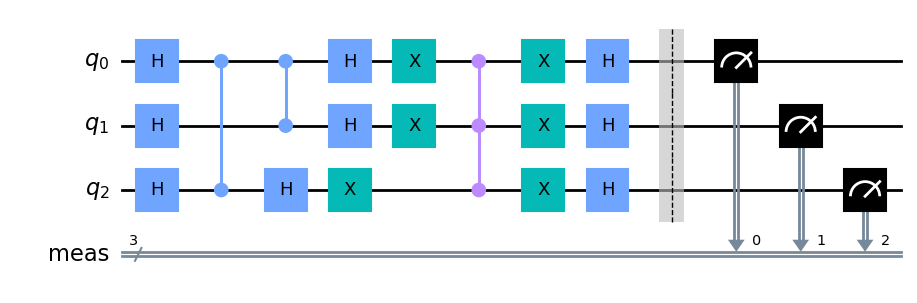

In [44]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2,1,0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

In [45]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-21 15:11:59,814: Credentials are already in use. The existing account in the session will be replaced.


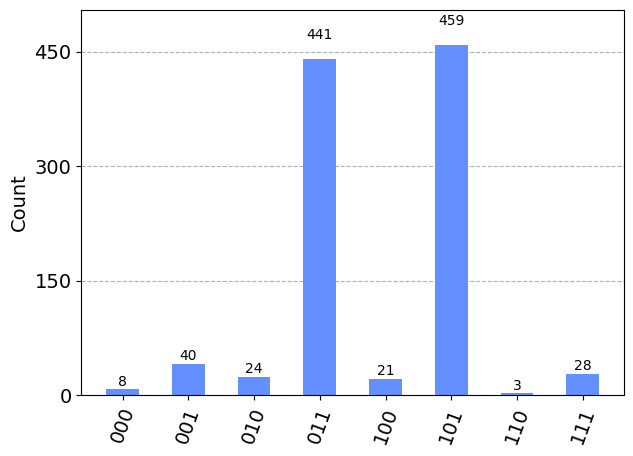

In [46]:
# Run 3 qubit Grover on Fake Nairobi noisy simulator
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)
# Get the results from the computation,
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Question 2

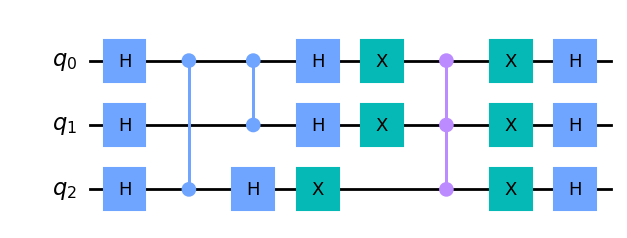

In [56]:
from gates_equivalent import cz_to_hcnoth

set_of_circuits = dict()

circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["circuit"]=[circuit]

exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

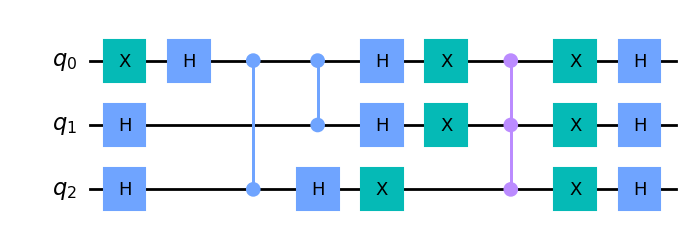

In [57]:
# inversion de qubit 
mutant_1 = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["mutant_1"]=[mutant_1]

exec(mutant_1)
prog.draw(output='mpl')

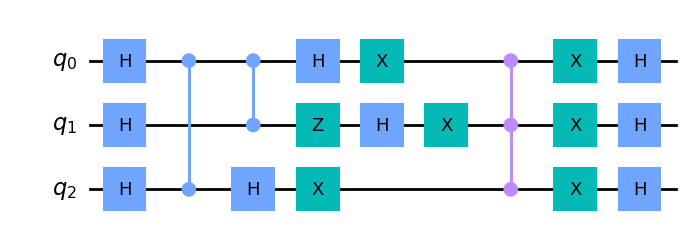

In [58]:
# insertion de porte
mutant_2 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.z(1)
for qubit in range(3):
    prog.h(qubit)
    
for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["mutant_2"]=[mutant_2]

exec(mutant_2)
prog.draw(output='mpl')

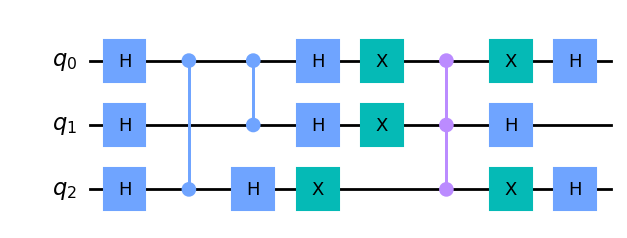

In [59]:
# suppression de porte
mutant_3 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

prog.x(0)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["mutant_3"]=[mutant_3]

exec(mutant_3)
prog.draw(output='mpl')

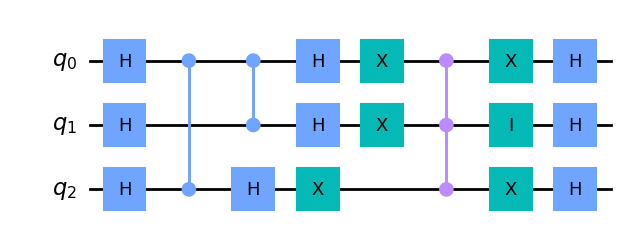

In [60]:
# changement de porte
mutant_4 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
for qubit in range(3):
    prog.x(qubit)

prog.ccz(2,1,0)

prog.x(0)
prog.i(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["mutant_4"]=[mutant_4]

exec(mutant_4)
prog.draw(output='mpl')

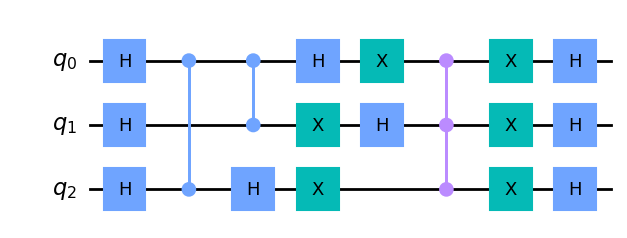

In [61]:
# échange de porte
mutant_5 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.h(0)
prog.x(1)
prog.h(2)

prog.x(0)
prog.h(1)
prog.x(2)

prog.ccz(2,1,0)

for qubit in range(3):
    prog.x(qubit)
    
for qubit in range(3):
    prog.h(qubit)
    '''

set_of_circuits["mutant_5"]=[mutant_5]

exec(mutant_5)
prog.draw(output='mpl')

In [62]:
print(set_of_circuits)

{'circuit': ['prog = QuantumCircuit(3)\nfor q in [0, 1, 2]:\n    prog.h(q)\nprog.cz(2, 0)\nprog.cz(1, 0)\n\nfor qubit in range(3):\n    prog.h(qubit)\n    \nfor qubit in range(3):\n    prog.x(qubit)\n\nprog.ccz(2,1,0)\n\nfor qubit in range(3):\n    prog.x(qubit)\n    \nfor qubit in range(3):\n    prog.h(qubit)\n    '], 'mutant_1': ['prog = QuantumCircuit(3)\n\nprog.x(0)\nfor q in [0, 1, 2]:\n    prog.h(q)\nprog.cz(2, 0)\nprog.cz(1, 0)\n\nfor qubit in range(3):\n    prog.h(qubit)\n\nfor qubit in range(3):\n    prog.x(qubit)\n\nprog.ccz(2,1,0)\n\nfor qubit in range(3):\n    prog.x(qubit)\n    \nfor qubit in range(3):\n    prog.h(qubit)\n    '], 'mutant_2': ['prog = QuantumCircuit(3)\nfor q in [0, 1, 2]:\n    prog.h(q)\nprog.cz(2, 0)\nprog.cz(1, 0)\n\nprog.z(1)\nfor qubit in range(3):\n    prog.h(qubit)\n    \nfor qubit in range(3):\n    prog.x(qubit)\n\nprog.ccz(2,1,0)\n\nfor qubit in range(3):\n    prog.x(qubit)\n    \nfor qubit in range(3):\n    prog.h(qubit)\n    '], 'mutant_3': ['pro

variants

In [ ]:
def cz_to_hcnoth(codeline:str,number:int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline)+"# number="+str(number)+"\n"+\
               re.sub('cz', "cx", new_codeline)+"# number="+str(number+1)+"\n"+\
               re.sub('cz[(](.*)[,]',"h(", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

In [ ]:
def x_to_cnotxcnot(codeline:str,number:int):
    help_qubit_now = re.compile("prog.x[(]input_qubit[[]")
    help_qubit = int(codeline[help_qubit_now.search(codeline).span()[1]]) #can not handle 10+ qubits
    if help_qubit==0:
        help_qubit = 1
    else:
        help_qubit = 0
    if re.search('prog.x', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('x[(]', "cx(input_qubit["+str(help_qubit)+"],", new_codeline)+"# number="+str(number)+"\n"+\
               new_codeline+"# number="+str(number+1)+"\n"+\
               re.sub(r'x[(]', "cx(input_qubit["+str(help_qubit)+"],", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No X gate for X transformation')

In [37]:
# Premier variant : cz_to_hcnoth
# Second variant : x_to_cnotxcnot
# Troisieme variant : x_to_hssh
# Quatrieme variant : switch prog.cz(2, 0) et prog.cz(1, 0)
# Cinquieme varaint : ajouter double x
search_sequence = 'prog.cz'

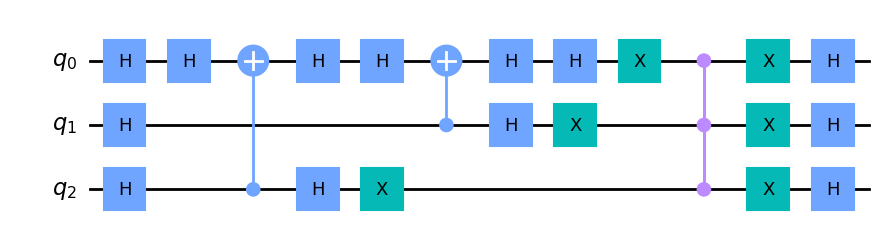

In [38]:
lines = circuit.splitlines()
mutant = ""
for i, line in enumerate(lines):
    if search_sequence in line:
        mutant+='\n'+cz_to_hcnoth(line,i)
    else :
        mutant+='\n'+line
exec(mutant)
prog.draw(output='mpl')